# **Load data** 

https://drive.google.com/file/d/1F-GSuRIRwgsEID-eocKezAihJi9Wlb38/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!unzip /gdrive/MyDrive/datapd.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/labels/ax4919.txt  
  inflating: /content/train/labels/ax492.txt  
  inflating: /content/train/labels/ax4920.txt  
  inflating: /content/train/labels/ax4921.txt  
  inflating: /content/train/labels/ax4922.txt  
  inflating: /content/train/labels/ax4923.txt  
  inflating: /content/train/labels/ax4924.txt  
  inflating: /content/train/labels/ax4925.txt  
  inflating: /content/train/labels/ax4926.txt  
  inflating: /content/train/labels/ax4927.txt  
  inflating: /content/train/labels/ax4928.txt  
  inflating: /content/train/labels/ax4929.txt  
  inflating: /content/train/labels/ax493.txt  
  inflating: /content/train/labels/ax4930.txt  
  inflating: /content/train/labels/ax4931.txt  
  inflating: /content/train/labels/ax4932.txt  
  inflating: /content/train/labels/ax4933.txt  
  inflating: /content/train/labels/ax4934.txt  
  inflating: /content/train/labels/ax4935.txt  
  inflating: /content/train/labels/ax49

#**Mô tả dữ liệu**

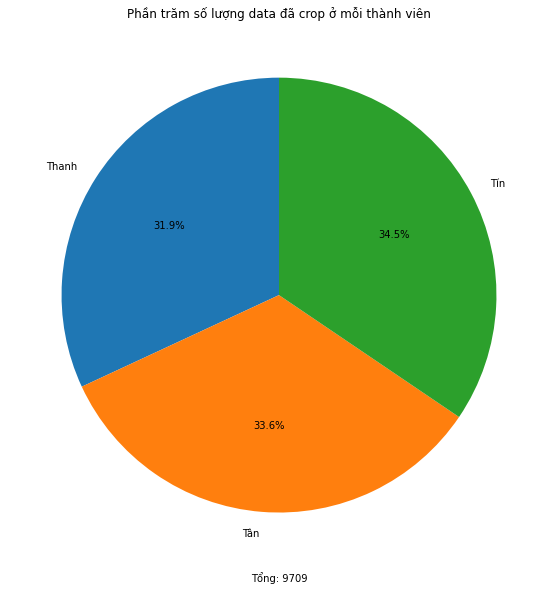

In [ ]:
import matplotlib.pyplot as plt

Thanh = 3101
Tan = 3265
Tin = 3349

plt.figure(1, figsize=(10,10))
plt.title('Phần trăm số lượng data đã crop ở mỗi thành viên')
plt.xlabel('Tổng: 9709')
plt.pie([Thanh,Tan,Tin], autopct="%.1f%%", startangle=90, labels=['Thanh','Tân','Tín'])
plt.show()

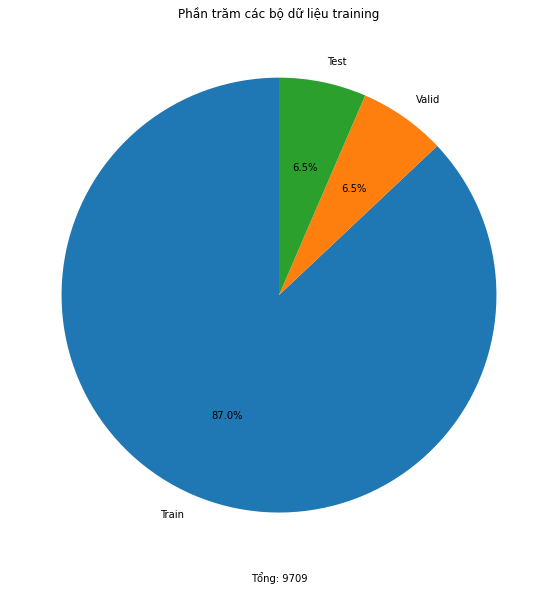

In [ ]:
Train = 8455
valid = 630
Test = 630

plt.figure(1, figsize=(10,10))
plt.title('Phần trăm các bộ dữ liệu training')
plt.xlabel('Tổng: 9709')
plt.pie([Train,valid,Test], autopct="%.1f%%", startangle=90, labels=['Train','Valid','Test'])
plt.show()

## Labeled data from cropped data.
* Thanh: 9000
* Tín: 359
* Tân: 350

**Tổng của nhóm: 9709**

**Tổng sau khi preprocess: 9709**

**145 classes**

**Bộ dữ 16Gb-> train 11,5GB**

#**Clone model**

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 10582, done.
remote: Total 10582 (delta 0), reused 0 (delta 0), pack-reused 10582
Receiving objects: 100% (10582/10582), 10.76 MiB | 24.82 MiB/s, done.
Resolving deltas: 100% (7309/7309), done.
/content/yolov5
     |████████████████████████████████| 596 kB 7.0 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


#**Train model**

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 1   --data /content/data.yaml --weights yolov5s.pt
# nếu trani típ thì thay weights thành đường dẫn tới file weight cũ

train: weights=yolov5s.pt, cfg=, data=/content/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=1, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-200-g9708cf5 torch 1.10.0+cu111 CPU

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspec

In [ ]:
!python val.py --data /content/data.yaml --weight /content/yolov5/runs/train/exp2/weights/best.pt --task val


val: data=/content/data.yaml, weights=['/content/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=valid, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False


In [ ]:
!python val.py --data /content/data.yaml --weight /content/yolov5/runs/train/exp2/weights/best.pt --task test

val: data=/content/data.yaml, weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.0-200-g9708cf5 torch 1.10.0+cu111 CPU

Traceback (most recent call last):
  File "val.py", line 382, in <module>
    main(opt)
  File "val.py", line 355, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 28, in decorate_context
    return func(*args, **kwargs)
  File "val.py", line 139, in run
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data)
  File "/content/yolov5/models/common.py", line 308, in __init__
    model = attempt_load(weights if isinstance(weights, list) else w, map_location=device)
  File "/content/yolov5/models/experi

#**Đánh giá model**

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
img=cv.imread("/content/yolov5/runs/val/exp/F1_curve.png")
cv2_imshow(img)

#**Mô tả**  

In [ ]:
!python detect.py --source /content/  --weights /content/yolov5/runs/train/exp/weights/best.pt